In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
import ta as ta
from ta import add_all_ta_features
from ta.utils import dropna

In [3]:
data = pd.read_csv(r'C:\Users\hp\Documents\Mean Reversion\NIFTY 50_Data.csv', index_col='Date', parse_dates=True)

In [4]:
data.head()

,Close
Date,
2023-05-04,18255.80
2023-05-03,18089.85
2023-05-02,18147.65
2023-04-28,18065.00
2023-04-27,17915.05


In [5]:
data.tail()

,Close
Date,
2013-05-10,6094.7
2013-05-09,6050.1
2013-05-08,6069.3
2013-05-07,6043.5
2013-05-06,5971.0


In [6]:
data.sort_values(by=['Date'], inplace=True)

In [7]:
data.head()

,Close
Date,
2013-05-06,5971.0
2013-05-07,6043.5
2013-05-08,6069.3
2013-05-09,6050.1
2013-05-10,6094.7


In [8]:
data.tail()

,Close
Date,
2023-04-27,17915.05
2023-04-28,18065.00
2023-05-02,18147.65
2023-05-03,18089.85
2023-05-04,18255.80


In [9]:
somedata = ta.momentum.RSIIndicator(data['Close'])

In [10]:
data['rsi'] = somedata.rsi()

In [11]:
data.head()

,Close,rsi
Date,,
2013-05-06,5971.0,NaN
2013-05-07,6043.5,NaN
2013-05-08,6069.3,NaN
2013-05-09,6050.1,NaN
2013-05-10,6094.7,NaN


In [12]:
data.tail()

,Close,rsi
Date,,
2023-04-27,17915.05,66.845643
2023-04-28,18065.00,71.235000
2023-05-02,18147.65,73.330807
2023-05-03,18089.85,69.516261
2023-05-04,18255.80,73.739901


In [13]:
data['sma5'] = data['rsi'].rolling(5).mean()

In [14]:
data['sma30'] = data['rsi'].rolling(30).mean()

In [15]:
data.head()

,Close,rsi,sma5,sma30
Date,,,,
2013-05-06,5971.0,NaN,NaN,NaN
2013-05-07,6043.5,NaN,NaN,NaN
2013-05-08,6069.3,NaN,NaN,NaN
2013-05-09,6050.1,NaN,NaN,NaN
2013-05-10,6094.7,NaN,NaN,NaN


In [16]:
data.tail()

,Close,rsi,sma5,sma30
Date,,,,
2023-04-27,17915.05,66.845643,61.720530,49.686505
2023-04-28,18065.00,71.235000,64.763400,50.893076
2023-05-02,18147.65,73.330807,67.284565,52.244405
2023-05-03,18089.85,69.516261,68.851608,53.514917
2023-05-04,18255.80,73.739901,70.933523,54.906652


In [17]:
data['daily_return'] = data['Close'].pct_change()

In [18]:
data.drop(['sma5', 'sma30'], axis=1, inplace=True)

In [19]:
data.head()

,Close,rsi,daily_return
Date,,,
2013-05-06,5971.0,NaN,NaN
2013-05-07,6043.5,NaN,0.012142
2013-05-08,6069.3,NaN,0.004269
2013-05-09,6050.1,NaN,-0.003163
2013-05-10,6094.7,NaN,0.007372


In [20]:
data.tail()

,Close,rsi,daily_return
Date,,,
2023-04-27,17915.05,66.845643,0.005695
2023-04-28,18065.00,71.235000,0.008370
2023-05-02,18147.65,73.330807,0.004575
2023-05-03,18089.85,69.516261,-0.003185
2023-05-04,18255.80,73.739901,0.009174


In [21]:
data['rsi_yesterday'] = data['rsi'].shift()

In [22]:
data.head()

,Close,rsi,daily_return,rsi_yesterday
Date,,,,
2013-05-06,5971.0,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN
2013-05-08,6069.3,NaN,0.004269,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN
2013-05-10,6094.7,NaN,0.007372,NaN


In [23]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday
Date,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327
2023-04-28,18065.00,71.235000,0.008370,66.845643
2023-05-02,18147.65,73.330807,0.004575,71.235000
2023-05-03,18089.85,69.516261,-0.003185,73.330807
2023-05-04,18255.80,73.739901,0.009174,69.516261


In [24]:
data['rsi_yesterday_chg'] = data['rsi_yesterday'].pct_change()

In [25]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg
Date,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN
2013-05-08,6069.3,NaN,0.004269,NaN,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN
2013-05-10,6094.7,NaN,0.007372,NaN,NaN


In [26]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg
Date,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018


In [27]:
data.loc[data['rsi_yesterday'] > 70, 'signal_rsi'] = -1
data.loc[data['rsi_yesterday'] < 30, 'signal_rsi'] = 1

In [28]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi
Date,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,NaN
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,NaN
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,NaN


In [29]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi
Date,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,NaN
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,NaN
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,-1.0
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,-1.0
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,NaN


In [31]:
data['signal_rsi'] = data['signal_rsi'].fillna(0)

In [32]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi
Date,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,0.0
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,0.0
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,0.0
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,0.0
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,0.0


In [33]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi
Date,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,0.0
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,0.0
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,-1.0
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,-1.0
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,0.0


In [34]:
data['market'] = ( 1 + data['signal_rsi']*data['daily_return'] )

In [35]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market
Date,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,0.0,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,0.0,1.0
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,0.0,1.0
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,0.0,1.0
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,0.0,1.0


In [36]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market
Date,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,0.0,1.000000
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,0.0,1.000000
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,-1.0,0.995425
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,-1.0,1.003185
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,0.0,1.000000


In [37]:
data['market'] = data['market'].cumprod()

In [38]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market
Date,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,0.0,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,0.0,1.0
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,0.0,1.0
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,0.0,1.0
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,0.0,1.0


In [39]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market
Date,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,0.0,0.830822
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,0.0,0.830822
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,-1.0,0.827021
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,-1.0,0.829655
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,0.0,0.829655


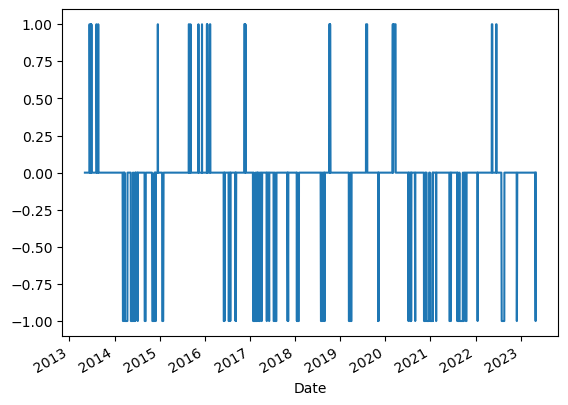

In [40]:
fig, ax = plt.subplots()
data['signal_rsi'].plot(ax=ax)
plt.show()

In [41]:
data['signal_rsi'] = data['signal_rsi'].mask((data['signal_rsi'] == 1) & (data['signal_rsi'].shift() == 1), 0)
data['signal_rsi'] = data['signal_rsi'].mask((data['signal_rsi'] == -1) & (data['signal_rsi'].shift() == -1), 0)
data['signal_rsi'] = data['signal_rsi'].mask((data['signal_rsi'] == 1) & (data['signal_rsi'].shift() == -1), 0)
data['signal_rsi'] = data['signal_rsi'].mask((data['signal_rsi'] == -1) & (data['signal_rsi'].shift() == 1), 0)

In [42]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market
Date,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,0.0,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,0.0,1.0
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,0.0,1.0
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,0.0,1.0
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,0.0,1.0


In [43]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market
Date,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,0.0,0.830822
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,0.0,0.830822
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,-1.0,0.827021
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,0.0,0.829655
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,0.0,0.829655


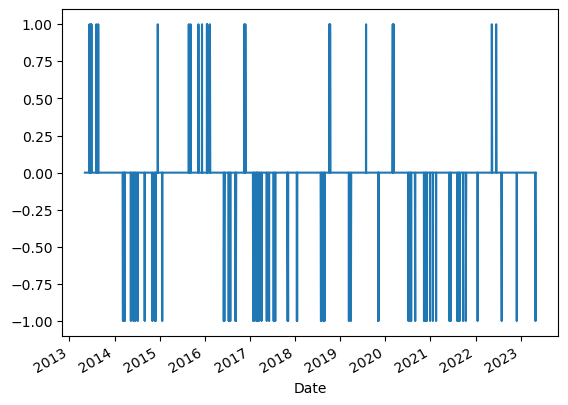

In [44]:
fig, ax = plt.subplots()
data['signal_rsi'].plot(ax=ax)
plt.show()

In [45]:
data['market_1'] = ( 1 + data['signal_rsi']*data['daily_return'] )

In [46]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market,market_1
Date,,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,0.0,1.0,1.0
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,0.0,1.0,1.0
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,0.0,1.0,1.0
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,0.0,1.0,1.0


In [47]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market,market_1
Date,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,0.0,0.830822,1.000000
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,0.0,0.830822,1.000000
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,-1.0,0.827021,0.995425
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,0.0,0.829655,1.000000
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,0.0,0.829655,1.000000


In [48]:
data['market_1'] = data['market_1'].cumprod()

In [49]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market,market_1
Date,,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,0.0,1.0,1.0
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,0.0,1.0,1.0
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,0.0,1.0,1.0
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,0.0,1.0,1.0


In [50]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,signal_rsi,market,market_1
Date,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,0.0,0.830822,1.007509
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,0.0,0.830822,1.007509
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,-1.0,0.827021,1.002899
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,0.0,0.829655,1.002899
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,0.0,0.829655,1.002899


In [51]:
import ffn

In [52]:
stats = data['market'].calc_stats()
stats.display()

Stats for market from 2013-05-06 00:00:00 - 2023-05-04 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                  -0.19  -1.85%  -32.46%

Annualized Returns:
mtd     3m      6m     ytd     1y     3y      5y      10y     incep.
------  ------  -----  ------  -----  ------  ------  ------  --------
-0.14%  -0.14%  0.19%  -0.14%  0.95%  -2.00%  -6.57%  -1.85%  -1.85%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  -0.19    -0.18      -0.21
mean    -1.56%   -1.47%     -1.89%
vol     8.19%    8.32%      9.14%
skew    -8.32    -7.98      -1.80
kurt    236.61   78.30      4.57
best    6.62%    3.17%      9.60%
worst   -12.98%  -23.62%    -24.58%

Drawdowns:
max      avg       # days
-------  ------  --------
-32.46%  -2.86%    154.83

Misc:
---------------  ------
avg. up month    1.23%
avg. down month  -0.61%
up year %        40.00%
12m 

In [53]:
stats1 = data['market_1'].calc_stats()
stats1.display()

Stats for market_1 from 2013-05-06 00:00:00 - 2023-05-04 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                   0.02  0.03%   -11.64%

Annualized Returns:
mtd     3m      6m      ytd     1y      3y      5y      10y    incep.
------  ------  ------  ------  ------  ------  ------  -----  --------
-0.46%  -0.46%  -0.74%  -0.46%  -2.39%  -0.73%  -2.23%  0.03%  0.03%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.02     0.02       -0.07
mean    0.07%    0.07%      -0.23%
vol     2.94%    2.84%      3.28%
skew    -4.82    -1.61      1.29
kurt    266.79   18.63      2.10
best    2.32%    3.17%      6.98%
worst   -4.90%   -5.48%     -4.88%

Drawdowns:
max      avg       # days
-------  ------  --------
-11.64%  -2.81%       477

Misc:
---------------  ------
avg. up month    0.99%
avg. down month  -0.22%
up year %        20.00%
12

In [54]:
prices_market =data['market']
ax = stats.prices.to_drawdown_series().plot(figsize=(15, 8),title='Drawdown')

In [55]:
prices_market1 =data['market_1']
ax = stats1.prices.to_drawdown_series().plot(figsize=(15, 8),title='Drawdown')

In [56]:
ax = prices_market.plot(logy=True,figsize=(15, 8),title='market Curve')

C:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:410: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  [a.set_yscale("log") for a in axes]


In [57]:
ax = prices_market1.plot(logy=True,figsize=(15, 8),title='market_1 Curve')